# Analisi di stabilità nei sistemi di controllo

Continuiamo il nostro viaggio nel mondo dei sistemi di controllo approfondendo l'analisi di stabilità. Costruiamo sulle conclusioni a cui siamo arrivati ​​l'ultima volta.

Consideriamo un sistema a circuito chiuso caratterizzato dalla sua funzione di trasferimento. Per semplicità, assumiamo un sistema a feedback unitario in cui $ G(s) $ è la funzione di trasferimento ad anello aperto, $ R $ è l'input e $ Y $ è l'output.

<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system.png?1" alt="17_Stability_and_Routh_Criterion_system" style="width:450px;"/>
</tr></table>


La funzione di trasferimento ad anello chiuso è data da:

$$
\frac{Y(s)}{R(s)} = \frac{G(s)}{1 + G(s)}
$$

L'equazione caratteristica del nostro sistema è $ 1 + G(s) = 0 $. Le radici di questa equazione, note anche come poli a circuito chiuso, determinano la stabilità del sistema.


#### Criteri di stabilità (**Richiamo dell'ultima lezione**)

La stabilità è determinata dalla posizione di queste radici nel piano complesso.

1. **Sistema stabile:** un sistema è stabile se *tutte* le radici dell'equazione caratteristica giacciono rigorosamente nel semipiano sinistro (LHP).
 - Ricorda i commenti che non abbiamo stabilità asintotica e stabilità BIBO.

2. **Sistema instabile:** Un sistema è instabile se almeno una radice si trova nel semipiano destro (RHP) o almeno una coppia di radici si trova sull'asse immaginario (asse $j\omega$).

3. **Sistema marginalmente stabile:** Questo è un caso speciale in cui tutte le radici caratteristiche si trovano nella LHP, ad eccezione di alcune radici semplici sull'asse immaginario. Queste sono radici distinte e non ripetitive.



**🤔 Domanda pop-up:** Perché è fondamentale che le radici sull'asse $j\omega$ siano semplici per la stabilità marginale?

**Risposta:** Le radici semplici sull'asse $j\omega$ danno come risultato output limitati per determinate classi di input, rendendo il sistema marginalmente stabile in condizioni specifiche.

## Determinazione della stabilità

Procediamo ora per determinare la stabilità. L'equazione caratteristica può generalmente essere rappresentata come un polinomio di ordine ennesimo:

$$
\Delta(s) = a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

- Questa equazione deriva da $ 1 + G(s) = 0 $ e rappresenta i poli del nostro sistema a circuito chiuso.

- Vorremmo sapere se gli zeri di queste equazioni caratteristiche sono stabili oppure no.

**Nota:** gli zeri del sistema a circuito chiuso non vengono considerati nell'analisi di stabilità, poiché influiscono solo sull'entità, non sulla modalità, della risposta.

#### Controllabilità, osservabilità e zeri

Un presupposto cruciale nella nostra analisi è che gli zeri non annullano i poli, una condizione tipicamente riscontrata nei sistemi controllabili e osservabili. Se uno zero annulla un polo instabile può portare a valutazioni errate di stabilità.

Questo è il punto di convergenza sia per la stabilità asintotica che per la stabilità BIBO (Bounded Input Bounded Output). Negli scenari in cui queste condizioni non sono soddisfatte, i due tipi di stabilità divergono nelle loro interpretazioni. Nello specifico, nella stabilità BIBO, l'annullamento di un polo da parte di uno zero non si manifesta nel comportamento del sistema. Tuttavia, quando si considera la stabilità interna, che viene analizzata utilizzando un modello delle variabili di stato, l’impatto di tale polo annullato diventa evidente sulla stabilità complessiva del sistema.

La presunzione che un sistema sia sia controllabile che osservabile generalmente vale per la maggior parte dei sistemi del mondo reale.

## Criterio di stabilità della rotta

Rivolgiamo ora la nostra attenzione al criterio di stabilità di Routh, un metodo prezioso nel campo dell'analisi di stabilità. Mentre i moderni strumenti numerici possono calcolare senza sforzo le radici di un'equazione, il criterio di Routh aiuta oltre questi metodi numerici, specialmente in contesti orientati alla progettazione. Ci consente sia di valutare la stabilità che di identificare i parametri di progettazione che garantiscono una configurazione stabile del sistema.

Considera la nostra equazione caratteristica: $a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0$. I coefficienti di questa equazione sono intrinsecamente legati agli attributi fisici del sistema. Un'indagine comune potrebbe comportare la determinazione degli intervalli consentiti per questi coefficienti che garantiscono la stabilità del sistema. In questi casi, fare affidamento esclusivamente su strumenti numerici può rivelarsi inadeguato, poiché in genere richiedono valori numerici predefiniti per i coefficienti, cosa non sempre fattibile negli scenari di progettazione. Il criterio di stabilità Routh affronta questa lacuna, fornendo informazioni sulle implicazioni di stabilità dei diversi parametri del sistema.


#### Costruire l'array Routh

Iniziamo con la nostra equazione caratteristica:

$$
a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

- Assicurarsi che $ a_n \neq 0 $ per evitare radici banali in $ s = 0 $.
-$a_0 > 0$. Se $ a_0 $ non è positivo possiamo semplicemente moltiplicare per $-1$ e questo non cambia l'analisi.


**🤔 Domanda pop-up:** Perché è importante che il coefficiente principale $ a_0 $ sia positivo nell'analisi di stabilità di Routh?

**Risposta:** Un $ a_0 $ positivo garantisce che l'array Routh inizi con un valore positivo, che è fondamentale per determinare correttamente il numero di cambi di segno e, di conseguenza, la stabilità del sistema.

### Condizioni necessarie

- **Tutti i coefficienti devono essere positivi:** affinché un sistema sia stabile, ogni coefficiente nel polinomio caratteristico deve essere positivo e diverso da zero. Un coefficiente zero o negativo è una bandiera rossa, che indica potenziale instabilità.
Nota che se non avessimo $ a_0 > 0 $ allora questa condizione diventa: tutti i coefficienti devono avere lo stesso segno.


### Condizioni sufficienti: costruzione del Routh Array

Data l’equazione caratteristica:

$$
a_0 s^n + a_1 s^{n-1} + \dots + a_{n-1} s + a_n = 0
$$

Ora costruiamo l'array di Routh, un metodo strutturato per analizzare la stabilità di un'equazione polinomiale. L'array Routh viene costruito riga per riga, utilizzando i coefficienti del polinomio caratteristico.

1. **Prime due righe:** le prime due righe derivano direttamente dal polinomio. Per un polinomio di grado $ n $, la prima riga contiene i coefficienti delle potenze pari di $ s $ (ad esempio, $ a_0, a_2, a_4, \ldots $), mentre la seconda riga contiene i coefficienti delle potenze dispari di $ s $ ( ad esempio, $ a_1, a_3, a_5, \ldots $).

2. **Righe successive:** ciascun elemento delle righe successive viene calcolato utilizzando una formula specifica. Per la terza riga (corrispondente a $ s^{n-2} $), ciascun elemento viene calcolato come segue:

   - Il primo elemento della terza riga è dato da $ \frac{a_1 \times a_2 - a_0 \times a_3}{a_1} $.
   - Il secondo elemento è $ \frac{a_1 \times a_4 - a_0 \times a_5}{a_1} $, e così via.

   **Nota:** Se manca un coefficiente (ovvero, la potenza di $ s $ non appare nel polinomio), trattalo come zero in questi calcoli.

3. **Indicizzazione delle righe:** L'indicizzazione delle righe (ad esempio, $ s^{n-1}, s^{n-2}, \ldots $) serve come guida ma non corrisponde alle potenze di $ s $ nel polinomio originale dopo le prime due righe.

Ecco un esempio di come apparirebbe la struttura della tabella Routh per un generico polinomio di ordine $ n $ -esimo:

| Ordine di $s$ | Colonna 1 | Colonna 2 | Colonna 3 | ... | Colonna $\frac{n}{2}+1$ |
|--------------|----------|----------|----------|- ----|-----------------------|
| $s^n$ | $a_0$ | $a_2$ | $a_4$ | ... | $a_{2k}$ o 0 |
| $s^{n-1}$ | $a_1$ | $a_3$ | $a_5$ | ... | $a_{2k+1}$ o 0 |
| $s^{n-2}$ | $b_1 = \frac{a_1 a_2 - a_0 a_3}{a_1}$ | $b_2 = \frac{a_1 a_4 - a_0 a_5}{a_1}$ | | ... | |
| $s^{n-3}$ | | | | ... | |
| ... | | | | ... | |
| $s^1$ | | | | ... | |
| $s^0$ | | | | ... | |


- **$ k $** è la parte intera di $ \frac{n}{2} $.
- Un coefficiente mancante è 0.

### Esempio illustrativo

Illustriamolo con uno specifico polinomio del 4° ordine:

$$
s^4 + 8 s^3 + 18 s^2 + 16 s + 5 = 0
$$

1. **Prime due righe:**
   - Riga per $ s^4 $: $ 1 $ (coefficiente di $ s^4 $), $ 18 $ (coefficiente di $ s^2 $), $ 5 $ (termine costante).
   - Riga per $ s^3 $: $ 8 $ (coefficiente di $ s^3 $), $ 16 $ (coefficiente di $ s^1 $), $ 0 $ (poiché non esiste $ s^{-1} termine $).

2. **Riga per $ s^2 $:**
   - Primo elemento: $ \frac{(8 \times 18 - 1 \times 16)}{8} = \frac{128}{8} = 16 $.
   - Secondo elemento: $ \frac{(8 \times 5 - 1 \times 0)}{8} = \frac{40}{8} = 5 $.
   - Il terzo elemento è zero (poiché non ci sono più elementi da utilizzare nel calcolo).

3. **Riga per $ s^1 $:**
   - Primo elemento: $ \frac{(16 \times 16 - 8 \times 5)}{16} = \frac{27}{2} = 13,5 $.
   - Il secondo elemento è zero (poiché gli elementi corrispondenti sopra sono zero o non esistono).

4. **Riga per $ s^0 $:**
   - È necessario solo il primo elemento, che è uguale al secondo elemento della riga precedente: $ 5 $.

Ecco l'array Routh corretto:

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|------------------|----------|----------|-------- --|
| $ s^4 $ | 1| 18| 5|
| $ s^3 $ | 8| 16| 0|
| $ s^2 $ | 16| 5| 0|
| $ s^1 $ | 13,5 | 0| |
| $ s^0 $ | 5| | |

Poiché non ci sono cambiamenti di segno nella prima colonna dell'array Routh, questo sistema è stabile. Il criterio di stabilità di Routh ci dice che tutte le radici dell'equazione caratteristica si trovano nella metà sinistra del piano complesso, indicando stabilità.

### Analisi della stabilità con l'array Routh

Dopo aver costruito l'array Routh, esaminiamo i segni della prima colonna per trarre conclusioni sulla stabilità del sistema.

- Se non ci sono cambiamenti di segno nella prima colonna dell'array Routh, il sistema è stabile.
- Se ci sono cambiamenti di segno, il sistema non è stabile e il numero di radici nella destra è uguale al numero di cambiamenti di segno. I criteri quindi forniscono informazioni sul numero di radici instabili, ma non danno la posizione delle radici.

In [ ]:
import numpy as np

def routh_array(coefficients):
    n = len(coefficients)
    routh = []

    # First two rows
    r1 = [coefficients[i] for i in range(0, n, 2)]
    r2 = [coefficients[i] for i in range(1, n, 2)]
    
    routh.append(r1)
    routh.append(r2 + [0] * (len(r1) - len(r2)))  # Padding zeros

    # Other rows
    for i in range(2, n):
        row = []
        for j in range(len(r1) - 1):
            # Calculate element
            first = routh[i-1][0]
            upper = routh[i-2][j+1]
            left = routh[i-1][j+1] if j+1 < len(routh[i-1]) else 0
            element = ((upper * first) - left * routh[i-2][0]) / first
            row.append(element)
        routh.append(row + [0] * (len(r1) - len(row)))  # Padding zeros

        # Check for row of zeros
        if all(r == 0 for r in row):
            print("Row of zeros detected. Special procedure needed.")
            return routh

    return routh

# Example usage
coeffs = [1, 8, 18, 16, 5]
routh = routh_array(coeffs)

# Printing the Routh array
for row in routh:
    print(row)


[1, 18, 5]
[8, 16, 0]
[16.0, 5.0, 0]
[13.5, 0.0, 0]
[5.0, 0.0, 0]


### Esempio illustrativo 2

Per calcolare l'array Routh per il polinomio $ 3s^4 + 10s^3 + 5s^2 + 5s + 2 = 0 $, possiamo usare lo stesso metodo di prima.

Eseguiamo i calcoli passo dopo passo:

1. **Prime due righe:**
   - Riga per $ s^4 $: $ 3 $ (coefficiente di $ s^4 $), $ 5 $ (coefficiente di $ s^2 $), $ 2 $ (termine costante).
   - Riga per $ s^3 $: $ 10 $ (coefficiente di $ s^3 $), $ 5 $ (coefficiente di $ s^1 $), $ 0 $ (poiché non esiste $ s^{-1} termine $).

2. **Riga per $ s^2 $:**
   - Primo elemento: $ \frac{(10 \times 5 - 3 \times 5)}{10} = \frac{35}{10} = 3,5 $.
   - Secondo elemento: $ \frac{(10 \times 2 - 3 \times 0)}{10} = \frac{20}{10} = 2 $.
   - Il terzo elemento è zero (poiché non ci sono più elementi da utilizzare nel calcolo).

3. **Riga per $ s^1 $:**
   - Primo elemento: $ \frac{(3.5 \times 5 - 10 \times 2)}{3.5} = \frac{-2.5}{3.5} = -0.71 $.
   - Il secondo elemento è zero (poiché gli elementi corrispondenti sopra sono zero o non esistono).

4. **Riga per $ s^0 $:**
   - È necessario solo il primo elemento, che è uguale al primo elemento della riga precedente: $ 2 $.

Ecco l'array Routh completato:

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|------------------|----------|----------|-------- --|
| $ s^4 $ | 3| 5| 2|
| $ s^3 $ | 10| 5| 0|
| $ s^2 $ | 3,5 | 2| 0|
| $ s^1 $ | -0,71 | 0| |
| $ s^0 $ | 2| | |

Poiché ci sono due cambiamenti di segno nella prima colonna dell'array Routh (da positivo a negativo tra $ s^2 $ e $ s^1 $ e uno da negativo a positivo tra $ s^1 $ e $ s^0 $ ) , questo sistema è instabile.

Il criterio di stabilità di Routh indica che ci sono due radici dell'equazione caratteristica nella metà destra del piano complesso, portando alla conclusione di instabilità.

**Nota che in questo caso, dato che la seconda riga è divisibile per 5, avremmo potuto scrivere anche la seguente tabella:**

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|------------------|----------|----------|-------- --|
| $ s^4 $ | 3| 5| 2|
| $ s^3 $ | 2| 1| 0|
| $ s^2 $ | 3,5 | 2| 0|
| $ s^1 $ | $-\frac{1}{7}$ | 0| |
| $ s^0 $ | 2| | |

E finalmente possiamo provare la nostra funzione `routh_array`:

In [ ]:
routh_array([3, 10, 5, 5, 2])

[[3, 5, 2],
 [10, 5, 0],
 [3.5, 2.0, 0],
 [-0.7142857142857143, 0.0, 0],
 [2.0, 0.0, 0]]

## Criterio di stabilità della rotta: gestire le radici sull'asse immaginario

Ci addentriamo in scenari più complessi in cui le radici dell'equazione caratteristica possono trovarsi sull'asse immaginario (asse jω). Questa discussione ci condurrà attraverso il processo di gestione di questi casi speciali.

### Esempio illustrativo 3

Consideriamo un sistema rappresentato dall'equazione caratteristica

$$
\Delta(i) = s^5 + s^4 + 4s^3 + 24s^2 + 3s + 63 = 0
$$

Quando applichiamo il criterio di stabilità di Routh a questo sistema, ci troviamo di fronte ad una situazione unica. In questo caso, una riga completa nell'array Routh potrebbe risultare composta da tutti zeri, indicando la possibilità di radici sull'asse jω. Questo è un indicatore significativo, poiché implica che il sistema potrebbe mostrare stabilità o instabilità marginale.

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|----------------|----------|----------|---------- |
| $ s^5 $ | 1| 4| 3|
| $ s^4 $ | 1| 24| 63|
| $ s^3 $ | $\cancel{-20} \rightarrow -1$ | $\cancel{-60} \rightarrow -3$ | |
| $ s^2 $ | $\cancel{21} \rightarrow 1$ | $\cancel{63}\rightarrow 3 $ | 0|
| $ s^1 $ | $0$ | 0| |
| $ s^0 $ | | | |

### Comprendere la riga Tutto-Zero

   - Se incontriamo una riga tutta zero in qualsiasi passaggio, il coefficiente della riga successiva non è definito e dobbiamo costruire un polinomio ausiliario dalla riga immediatamente sopra la riga tutta zero e utilizzare la sua derivata per continuare la costruzione dell'array Routh.
   - Ciò indica la potenziale presenza di radici sull'asse jω.

- **Implicazione di righe tutte zero:** quando si incontra una riga tutta zero nell'array Routh, ciò suggerisce che l'equazione caratteristica potrebbe avere radici simmetriche attorno all'asse immaginario. Ciò potrebbe significare una coppia di radici che giacciono esattamente sull'asse jω o coppie coniugate complesse simmetriche lungo questo asse.

- **Incertezza sulla stabilità:** la presenza di una riga tutta zero non classifica immediatamente il sistema come stabile o instabile. Invece, indica che sono necessarie ulteriori analisi per determinare la stabilità del sistema.


<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_1.png?1" alt="17_Stability_and_Routh_Criterion_system_1" style="width:750px;"/>
</tr></table>

- Quando una riga è tutta zeri, non possiamo trarre conclusioni sulla stabilità del sistema e sono necessarie ulteriori indagini.

- Tieni presente che il sistema non può essere stabile.

- A causa della simmetria, una riga tutta zero sarà sempre associata a una potenza dispari di s.

#### Costruire il polinomio ausiliario

- Per affrontare la riga tutta zero, costruiamo un polinomio ausiliario dai coefficienti della riga appena sopra la riga tutta zero. Ad esempio, se la riga con tutti zero è su $ s^2 $, esamineremo la riga $ s^3 $ per questi coefficienti, se la riga con tutti zero è su $ s^1 $ (come nel nostro caso precedente ), esaminiamo $ s^2 $.

Con riferimento al nostro esempio sopra, il polinomio ausiliario è:

$$ A(s) = s^2 + 3 $$

- Nota che $s^2$ proviene dall'ordine della riga appena sopra la riga composta da tutti zero (nel nostro caso $s^2$).

- **Il polinomio ausiliario è un fattore dell'equazione caratteristica originale $\Delta(s)$.**

- Poiché in questo caso le radici del polinomio ausiliario sono immaginarie, possiamo concludere che anche le radici dell'equazione caratteristica si trovano sull'asse immaginario (e siamo nel caso _medio_ sopra), e il sistema è marginalmente stabile o instabile nel caso abbiamo più poli immaginari. Infatti per trarre conclusioni sulla stabilità dobbiamo trarre conclusioni anche sulle restanti radici dell'equazione caratteristica (quelle del polinomio ausiliario sono un sottoinsieme).

#### Conclusione sulla stabilità

Una volta ottenuto il polinomio ausiliario ci sono due modi per trarre conclusioni sulla stabilità:

1. Dividiamo l'equazione caratteristica totale per il polinomio ausiliario, otteniamo il resto e applichiamo il criterio di Routh al polinomio resto

2. Prendiamo la derivata del polinomio ausiliario $\frac{dA}{ds}$ e sostituiamo la riga tutta zero con i coefficienti di questa derivata. Questa modifica ci permette di continuare con la costruzione dell'array Routh.

Nel nostro caso:

$$\frac{dA}{ds} = 2s + 0$$

e possiamo completare l'array Routh:

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|----------------|----------|----------|---------- |
| $ s^5 $ | 1| 4| 3|
| $ s^4 $ | 1| 24| 63|
| $ s^3 $ | $\cancel{-20} \rightarrow -1$ | $\cancel{-60} \rightarrow -3$ | |
| $ s^2 $ | $\cancel{21} \rightarrow 1$ | $\cancel{63}\rightarrow 3 $ | 0|
| $ s^1 $ | 2| 0| |
| $ s^0 $ | 3| | |

- Dopo aver sostituito la riga composta da tutti zero e aver completato l'array Routh, rivalutiamo la prima colonna per i cambiamenti di segno. Il numero di cambiamenti di segno ora ci dà informazioni sulla stabilità del sistema, considerando le radici sull'asse immaginario.

- Nel nostro caso ci sono due cambi di segno. Concludiamo che il polinomio originale ha:
   - due radici nella RHP (dall'array Routh)
   - due radici sull'asse immaginario (dal polinomio ausiliario)
   - una radice nella sinistra sinistra (quella rimanente)
   
Il sistema è instabile.

#### Caso speciale in cui la riga $s_0$ è tutta zeri?
- **Infattibilità di una riga tutta zero $s_0$:** una riga tutta zero al livello $s_0$ (l'ultima riga dell'array Routh) non è praticamente fattibile. Se dovesse verificarsi, implicherebbe una singola radice all'origine, il che contraddice la situazione di righe tutte zero poiché una singola radice non crea questo scenario.

- **Considerazione sulla simmetria:** La simmetria coinvolta nella distribuzione della radice dell'equazione caratteristica implica che una riga tutta zero corrisponderà a una potenza pari di $s_0$. Pertanto, le radici associate ad una riga tutta zero avranno sempre una certa simmetria rispetto all'asse immaginario.

-------

Il criterio di stabilità di Routh è uno strumento analitico fondamentale utilizzato nell'ingegneria di controllo per valutare la stabilità dei sistemi lineari. Ecco un riepilogo dei punti chiave che abbiamo visto finora:

1. **Scopo**: il criterio di Routh viene utilizzato per determinare se un sistema è stabile, instabile o marginalmente stabile senza calcolare esplicitamente le radici della sua equazione caratteristica.

2. **Equazione caratteristica**: la stabilità viene analizzata in base all'equazione caratteristica della funzione di trasferimento del sistema, tipicamente rappresentata come un polinomio in $ s $ (la variabile di Laplace).

3. **Costruzione dell'array Routh**: il criterio prevede la costruzione di un array tabulare, noto come array Routh, utilizzando i coefficienti dell'equazione caratteristica. L'array è formato riga per riga, con le prime due righe riempite con i coefficienti del polinomio, alternando potenze pari e dispari di $ s $.

4. **Analisi di stabilità**:
   - Se tutti gli elementi nella prima colonna dell'array Routh sono positivi, il sistema è stabile (nessun polo nella metà destra del piano s).
   - La presenza di cambiamenti di segno nella prima colonna indica instabilità. Il numero di cambiamenti di segno corrisponde al numero di poli nella metà destra del piano s.
   - Se una riga è composta interamente da zeri, indica radici simmetriche rispetto all'asse immaginario e richiede un'ulteriore analisi.

5. **Gestione di casi speciali**:
   - **Riga tutta zero**: quando una riga nell'array Routh è tutta zero, suggerisce radici simmetriche attorno all'asse immaginario. Un polinomio ausiliario viene formato dalla riga sopra la riga composta da tutti zero e la sua derivata viene utilizzata per continuare la costruzione dell'array Routh.
   - **Stabilità marginale**: una riga tutta zero può indicare stabilità marginale, dove le radici si trovano sull'asse immaginario. Tuttavia, sono necessarie ulteriori indagini per confermarlo.

6. **Polinomio ausiliario**: questo polinomio deriva dalla riga sopra la riga di tutti zero. La derivata del polinomio ausiliario viene utilizzata per sostituire la riga tutta zero e continuare la costruzione dell'array Routh.

8. **Limitazioni**: Sebbene il criterio Routh possa indicare il numero e la posizione (metà piano sinistro o semipiano destro) delle radici, non fornisce i valori esatti di queste radici.

### Esempio illustrativo 3

Consideriamo il sistema caratterizzato dal polinomio

$$
s^6 + 2s^5 + 8s^4 + 12s^3 + 20s^2 + 16s + 16 = 0
$$

Mentre costruiamo l'array Routh, incontriamo una riga tutta zero in $ s^3 $.


| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 | Colonna 4 |
|------------------|----------|----------|-------- --|----------|
| $ s^6 $ | 1| 8| 20| 16|
| $ s^5 $ | $\cancel{2} \rightarrow 1$ | $\cancel{12} \rightarrow 6$ | $\cancel{16} \rightarrow 8$ | 0|
| $ s^4 $ | $\cancel{2} \rightarrow 1$ | $\cancel{12} \rightarrow 6$ | $\cancel{16} \rightarrow 8$ | 0|
| $ s^3 $ | 0| 0| | |
| $ s^2 $ | ... | ... | | |
| $ s^1 $ | ... | | | |
| $ s^0 $ | ... | | | |




L'array Routh deve essere completato con ulteriori calcoli a partire dalla riga $ s^3 $ modificata. Questo processo fornirà le informazioni necessarie per valutare la stabilità del sistema.

In questo caso, formiamo un polinomio ausiliario dalla riga $ s^4 $, che risulta essere:

$$ A(s) = s^4 + 6s^2 + 8 $$

Il passo successivo consiste nel ricavare la derivata di questo polinomio ausiliario:

$$ \frac{dA}{ds} = 4s^3 + 12s + 0 $$

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 | Colonna 4 |
|------------------|----------|----------|-------- --|----------|
| $ s^6 $ | 1| 8| 20| 16|
| $ s^5 $ | $\cancel{2} \rightarrow 1$ | $\cancel{12} \rightarrow 6$ | $\cancel{16} \rightarrow 8$ | 0|
| $ s^4 $ | $\cancel{2} \rightarrow 1$ | $\cancel{12} \rightarrow 6$ | $\cancel{16} \rightarrow 8$ | 0|
| $ s^3 $ | $\cancel{4} \rightarrow 1 $ | $\cancel{12} \rightarrow 3$ | | |
| $ s^2 $ | 3| 8| | |
| $ s^1 $ | $\frac{1}{3}$ | | | |
| $ s^0 $ | 8| | | |

**Conclusioni**

- La prima colonna dell'array Routh è tutta positiva (nessun cambiamento di segno). Ciò significa che il polinomio $\frac{\Delta(s)}{A(s)}$ non ha radici nella RHP.

- Quando guardiamo il polinomio ausiliario: $ A(s) = s^4 + 6s^2 + 8 $, possiamo risolvere le sue radici:

   - imposta $s^2=z \Rightarrow A(s) = z^2 + 6z + 8 $ con radici: $s=\pm j\sqrt{2};\;\;\;s=\pm j2$
   - il polinomio ausiliario ha solo radici immaginarie (caso centrale nel diagramma che abbiamo disegnato sopra)
  
- Il sistema è quindi **marginalmente stabile**, oscillando a una frequenza $\sqrt{2}\;\;rad/s$ e a $2\;\;rad/s$ (l'uscita rimane limitata). Utilizzeremo questo punto durante la fase di progettazione.

### Situazione: Zero elementi pivot di seguito

Una situazione speciale si verifica quando solo l'elemento pivot (il primo elemento) di una riga nell'array Routh è zero, mentre almeno uno degli elementi successivi nella stessa riga è diverso da zero. Questo scenario richiede un approccio distinto per la continuazione della costruzione dell'array Routh. Ecco i dettagli:

- L'elemento pivot in un array Routh si riferisce al primo elemento di qualsiasi riga. Un elemento pivot zero con almeno un elemento diverso da zero nella stessa riga presenta un caso unico nella formulazione dell'array.

- Un elemento pivot pari a zero rende impossibile utilizzare la formula matriciale Routh standard per la riga successiva, poiché comporta la divisione per l'elemento pivot.

- La presenza di un elemento pivot zero non suggerisce immediatamente radici simmetriche o radici sull'asse immaginario, a differenza di una riga tutta zero. Rappresenta invece una condizione numerica risultante dai coefficienti specifici dell'equazione caratteristica.


#### Gestire l'elemento pivot zero
- **Approccio**: per continuare la costruzione dell'array Routh, in genere sostituiamo l'elemento pivot zero con un piccolo numero positivo, indicato come $ \epsilon $. Questa sostituzione consente al calcolo di procedere senza l'indeterminatezza causata dalla divisione per zero.

- **Significato di $ \epsilon $**: Il valore di $ \epsilon $ è considerato infinitesimo, tendente di fatto allo zero. Questa sostituzione è una tecnica matematica per superare l'ostacolo computazionale e non cambia la natura fondamentale del sistema analizzato.

**🤔 Domanda pop-up**: Cosa rappresenta la sostituzione di $ \epsilon $ al posto di un elemento pivot zero nell'array Routh?

**Risposta**: La sostituzione di $ \epsilon $ rappresenta un metodo per aggirare il problema computazionale della divisione per zero. Consente la continuazione della costruzione dell'array Routh e aiuta a trarre conclusioni sulla stabilità del sistema.

Analizziamo questo scenario attraverso un esempio:

Consideriamo il sistema caratterizzato dal polinomio

$$
s^5 + 3s^4 + 2s^3 + 6s^2 + 6s + 9 = 0
$$

| Ordine di $ s $ | Colonna 1 | Colonna 2 | Colonna 3 |
|------------------|----------|----------|-------- --|
| $ s^5 $ | 1| 2| 6|
| $ s^4 $ | 3| 6| 9|
| $ s^3 $ | 0| 3| |
| $ s^2 $ | | | |
| $ s^1 $ | | | |
| $ s^0 $ | | | |


Non possiamo fare alcuna valutazione di stabilità. La presenza di uno 0 come elemento cardine rappresenta una condizione numerica risultante dai coefficienti specifici dell'equazione caratteristica.

In questo caso, sostituiamo il pivot zero nella riga con $\epsilon$ e continuiamo a costruire l'array.
Ciò corrisponde a perturbare i coefficienti del polinomio.


### Perturbazione dei coefficienti dell'equazione caratteristica

1. **Stabilità delle radici**: è improbabile che le radici di un polinomio nel semipiano sinistro o destro "saltino" da un lato all'altro del piano complesso con una piccola perturbazione nei coefficienti. Questa stabilità delle posizioni delle radici nel piano complesso costituisce la base di questo approccio.

2. **Effetto di piccoli cambiamenti**: Se i coefficienti del polinomio caratteristico sono leggermente alterati (diciamo dell'1% o meno), si prevede che le posizioni fisiche delle radici nel piano complesso cambino solo leggermente. Ciò implica che le radici originariamente nel semipiano sinistro probabilmente rimarranno lì, e allo stesso modo per quelle nel semipiano destro.

3. **Preoccupazione con le radici sull'asse immaginario**: il rischio in questo metodo di perturbazione sorge se l'equazione caratteristica originale ha radici esattamente sull'asse immaginario (asse jω). Una piccola variazione nei coefficienti potrebbe spostare queste radici nel semipiano destro o sinistro, alterando la conclusione sulla stabilità. Se così fosse, non sapresti se queste radici immaginarie si sono spostate a sinistra o a destra.

4. **Assunzione dell'assenza di radici sull'asse immaginario**: se si sa in anticipo che non ci sono radici sull'asse immaginario, perturbare leggermente i coefficienti non dovrebbe influenzare in modo significativo le conclusioni sulla stabilità complessiva del sistema.
    - Nota che una riga tutta zero indicherà se potrebbero esserci radici sull'asse immaginario

5. **Gestione di uno Zero Pivot nell'array Routh**: In pratica, se una riga nell'array Routh ha un elemento pivot zero, questo problema può spesso essere risolto sostituendo lo zero con un piccolo numero positivo, $ \epsilon $. Questo approccio equivale effettivamente ad una piccola perturbazione dei coefficienti dell'equazione caratteristica.

6. **Importanza della riga tutta zero**: se c'è una riga tutta zero nell'array Routh, di solito indica le radici sull'asse immaginario. Pertanto, nei casi senza una riga composta da tutti zero, possiamo essere più sicuri che la perturbazione dei coefficienti (come con la sostituzione $ \epsilon $) non porterà a conclusioni errate riguardo alla stabilità.

7. **Applicazione pratica**: questa tecnica è particolarmente utile nei calcoli automatizzati o negli algoritmi in cui gestire un elemento pivot zero è computazionalmente problematico. Introducendo $ \epsilon $, è possibile completare l'array Routh e valutarne la stabilità.

8. **Valutazione del rischio**: il punto chiave qui è la valutazione del rischio quando si applica questa perturbazione. Se esiste la possibilità che le radici si trovino sull'asse immaginario, è necessario essere cauti, poiché la perturbazione potrebbe portare a conclusioni errate sulla stabilità.


Per ora supporremo che non ci siano radici sull'asse immaginario e perturberemo i coefficienti del polinomio.

In questo caso, sostituiamo il pivot zero nella riga con $\epsilon$ e continuiamo a costruire l'array.

Dopo aver sostituito il pivot zero con $\epsilon$, rivalutiamo la prima colonna per i cambiamenti di segno. Le conclusioni tratte da questo array Routh modificato aiutano a valutare la stabilità del sistema.


**Considerazione di \( \epsilon \) nell'analisi limite**: È importante notare che l'uso di $ \epsilon $ nel contesto di un processo limitante, dove tende allo zero, rende il suo segno (positivo o negativo ) irrilevante. Questo perché, nei casi in cui l'equazione caratteristica del sistema non ha radici sull'asse immaginario, il segno specifico della piccola perturbazione introdotta da $ \epsilon $ non incide in modo significativo sull'analisi di stabilità.


<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_zero_pivot_11.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_11" style="width:450px;"/>
</tr></table>

Completiamo quindi l'array Routh:

<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_zero_pivot_2.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_2" style="width:450px;"/>
</tr></table>

**Conclusioni sulla stabilità**:
Possiamo ora trarre conclusioni sulla stabilità. Dato che abbiamo scelto $ \epsilon > 0 $ allora abbiamo due cambi di segno, il che significa che il sistema ha due radici sulla destra, e quindi il sistema è instabile.


**Significato di una riga tutta zero**: se, nel processo di lasciare che $ \epsilon $ si avvicini allo zero, incontriamo una riga che diventa interamente zero, ciò suggerisce la potenziale esistenza di radici sull'asse immaginario. In tali scenari, qualsiasi conclusione sulla stabilità derivata sulla base del limite $ \epsilon \rightarrow 0 $ dovrebbe essere affrontata con cautela, poiché potrebbe non riflettere accuratamente il comportamento del sistema. In questo contesto è fondamentale considerare la direzione da cui $ \epsilon $) si avvicina allo zero (sia dal lato positivo che negativo). Il segno di $ \epsilon $ diventa importante perché, a seconda che $ \epsilon $ tenda a zero dalla direzione positiva o negativa, può influenzare l'analisi delle radici che giacciono vicine all'asse immaginario. Questa sensibilità al segno di $ \epsilon $ è particolarmente rilevante quando si ha a che fare con radici che possono attraversare l'asse immaginario a causa di perturbazioni così piccole, alterando così le caratteristiche di stabilità del sistema. Pertanto, nei casi con una riga tutta zero, la valutazione della stabilità dovrebbe includere un attento esame di come questi piccoli cambiamenti in $ \epsilon $ influenzano la posizione delle radici rispetto all'asse immaginario.


In questi casi, formuliamo un polinomio ausiliario utilizzando la riga immediatamente sopra la riga tutta zero. Questo polinomio ausiliario aiuta ad analizzare ulteriormente il comportamento del sistema.

Il passo successivo prevede la divisione del polinomio caratteristico originale per questo polinomio ausiliario per isolare le radici rimanenti. Il criterio di stabilità di Routh viene quindi riapplicato a questo polinomio del resto.

### Esempio illustrativo

Consideriamo il polinomio:

$$
\Delta(i) = s^6 + s^5 +3s^4 + 3s^3 + 3s^2 + 2s+ 1
$$

<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_zero_pivot_3.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_3" style="width:450px;"/>
</tr></table>

Quando $ \epsilon $ si avvicina a zero, gli elementi nella riga $ s^1 $ dell'array Routh convergono a zero. Questa situazione suggerisce una potenziale presenza di radici sull'asse immaginario nel piano s. Per risolvere questo problema è necessario un esame più attento del polinomio ausiliario. Nei casi in cui non si trovano radici sull'asse immaginario, tipicamente si procede sostituendo la riga tutta zero con i coefficienti derivati ​​dalla derivata del polinomio ausiliario. Tuttavia, se le radici sull'asse immaginario sono effettivamente presenti, adottiamo un approccio diverso: il polinomio caratteristico originale viene diviso per il polinomio ausiliario e il criterio di stabilità di Routh viene quindi applicato a questo polinomio del resto risultante.

Nell'esempio specifico analizzato, quando si considera il limite di $ \epsilon $ che si avvicina allo zero nella riga $ s^2 $, il polinomio ausiliario è formulato come $ A(s) = s^2 + 1 = 0 $.


1. **Radici del polinomio ausiliario**:
   - Il polinomio ausiliario $ A(s) = s^2 + 1 = 0 $ ha radici in $ s = \pm j $, indicando la presenza di radici sull'asse immaginario nel piano s. Queste radici sono posizionate simmetricamente rispetto all'asse reale.

2. **Divisione del polinomio originale**:
   - Data la presenza di radici dell'asse immaginario, il polinomio caratteristico originale deve essere diviso per il polinomio ausiliario. Questa divisione isola la restante parte del polinomio, che esclude le radici già individuate dal polinomio ausiliario. _Questa divisione produrrà un nuovo polinomio che rappresenta la parte del sistema non considerata dal polinomio ausiliario._
   
   $$
   \frac{\Delta(s)}{A(s)} = s^4 + s^3 + 2s^2 + 2s + 1
   $$

3. **Applicazione del criterio di stabilità di Routh al polinomio del resto**:
   - Una volta diviso il polinomio originale per $ A(s) = s^2 + 1 $, il polinomio risultante è soggetto al criterio di stabilità di Routh. Questa analisi rivelerà la stabilità del sistema per quanto riguarda le radici che non si trovano sull'asse immaginario.
   
<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_zero_pivot_4.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_4" style="width:450px;"/>
</tr></table>

4. **Interpretare i risultati**:
   - Se tutti gli elementi nella prima colonna del nuovo array Routh sono positivi, ciò indica che le restanti radici (escluse quelle sull'asse immaginario) si trovano nel semipiano sinistro, suggerendo stabilità per questa parte del sistema.
   - Se nella prima colonna ci sono cambiamenti di segno, indica instabilità dovuta al fatto che le radici si trovano nel semipiano destro.

In questo caso, quando $\epsilon \rightarrow 0$, ci sono due cambi di segno nella prima colonna dell'array. Ci sono quindi due radici nella RHP.

Il polinomio originale $\Delta(s)$ ha quindi due radici nella RHP e due radici nell'asse immaginario.

----

## Estendere il criterio della rotta oltre la stabilità assoluta

### Stabilità relativa

Il criterio di stabilità di Routh viene utilizzato per confermare la stabilità assoluta di un sistema, verificando che tutte le radici della sua equazione caratteristica siano localizzate nella metà sinistra del piano s. Dopo aver stabilito che un sistema è assolutamente stabile, con tutte le sue radici caratteristiche nel semipiano sinistro, il passo successivo è valutarne la stabilità relativa. La stabilità relativa si concentra sulla comprensione delle caratteristiche della risposta transitoria del sistema.

In altre parole, la stabilità relativa si riferisce al grado di stabilità del sistema, indicando quanto velocemente la risposta di un sistema si stabilizza al suo stato stazionario o quanto è resiliente alle oscillazioni e alle perturbazioni.

- **Significato delle posizioni delle radici**: Nel piano s, la posizione dei poli del sistema (radici dell'equazione caratteristica) determina la sua stabilità relativa. I poli più a sinistra nel piano s indicano un decadimento più rapido dei transitori, il che implica una maggiore stabilità relativa.

- **Costante di tempo e risposta**: la risposta transitoria di una modalità in un sistema può essere rappresentata come $ e^{-pt} $, dove $ p $ è il polo e $ t $ è il tempo. Questo può essere riscritto come $ e^{-\frac{t}{\tau}} $, dove $ \tau $, la costante di tempo, è l'inverso della parte reale del polo. Un $ \tau $ più piccolo significa una risposta più rapida.


- **Utilizzo del criterio di stabilità di Routh**: il criterio di stabilità di Routh può essere esteso per valutare la stabilità relativa esaminando quanto vicine sono le radici all'asse immaginario. Il criterio può accertare se le radici si trovano a sinistra di una linea verticale specificata nel piano s (ad esempio, $ s = -\sigma $), che rappresenta un limite dello smorzamento desiderato (vedi diagramma sotto). Saprai se i tuoi poli sono più veloci di $ e^{-\sigma t} $


<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_zero_pivot_5.png?1" alt="17_Stability_and_Routh_Criterion_system_zero_pivot_5" style="width:450px;"/>
</tr></table>

**🤔 Domanda pop-up**: In che modo la posizione dei poli nel piano s è correlata alla stabilità relativa?

**Risposta**: Più a sinistra si trovano i poli nel piano s, più velocemente decade la risposta transitoria del sistema, indicando una maggiore stabilità relativa. I poli più vicini all’asse immaginario suggeriscono un decadimento più lento dei transitori, implicando una stabilità relativa inferiore.

### Esempio illustrativo 4


Consideriamo il polinomio:

$$
s^3 + 7s^2 + 25s + 39 = 0
$$

- **Estensione del criterio di rotta per la stabilità relativa**:
   - Per analizzare la stabilità relativa, possiamo modificare il criterio di Routh per valutare se i poli si trovano a sinistra di una linea specifica nel piano s, ad esempio $ s = -\sigma $.
   - Sostituendo $ s = \hat{s} - \sigma $ nell'equazione caratteristica, spostiamo l'analisi su un nuovo piano ($ \hat{s} $-piano). Qui, $ \sigma $ è un valore predefinito che rappresenta il livello desiderato di smorzamento o velocità di risposta.
   
Ad esempio, per $\sigma=1$, possiamo cambiare la coordinata in $ s = \hat{s} - 1 $ e riscrivere l'equazione caratteristica come:

$$
\cappello^3 + 4\cappello^2 + 14\cappello + 20 = 0
$$
   
e applichiamo il criterio di Routh a questo nuovo polinomio.

Possiamo quindi verificare che, in questo caso, non ci sono cambiamenti di segno nella prima colonna dell'array Routh. Ciò significa che il polinomio originale non ha radici a destra della linea $s=-1$.

- L'array Routh stabilisce se il nuovo polinomio non ha radici a destra di $\hat{s}=0$.
- Se imposti $\hat{s}=0$ in $ s = \hat{s} - 1 $, questo ci darà: $s=-1$

**🤔 Domanda pop-up**: In che modo la scelta di $ \sigma $ influisce sull'analisi della stabilità relativa?

**Risposta**: La scelta di $ \sigma $ stabilisce un punto di riferimento per la velocità di risposta o smorzamento desiderata nel sistema. Analizzando le posizioni delle radici relative a $ s = -\sigma $, possiamo determinare se la risposta del sistema è più veloce o più lenta rispetto a questo benchmark, valutando così la sua relativa stabilità.

## Analisi della sensibilità e della stabilità dei parametri

Nella nostra continua esplorazione dei sistemi di controllo, approfondiamo un aspetto importante: la sensibilità della stabilità del sistema alle variazioni dei parametri. Ci concentreremo su un sistema di feedback caratterizzato da un parametro $ K $. Il nostro obiettivo è determinare l'intervallo di $ K $ che garantisce la stabilità del sistema.

### L'equazione caratteristica e l'array Routh

Consideriamo un sistema di feedback in cui:

$$ G(s) = \frac{K}{s(s^2+s+1)(s+4)} $$

e $ K $ è il nostro parametro di progettazione e vorremmo sceglierlo in modo tale che il sistema rimanga stabile.

La stabilità del sistema è governata dall'equazione caratteristica $ 1 + G(s) = 0 $. Per questo sistema, l'equazione caratteristica diventa una funzione di $ K $:

$$
s^4 + 5s^3 + 5s^2 + 4s + K = 0
$$

Costruiamo l'array Routh per questo sistema, tenendo presente che sarà una funzione di $ K $:


\begin{array}{c|ccc}
s^4 & 1 & 5 & K\\
s^3 & 5 & 4 & \\
s^2 & \frac{21}{5} & K & \\
s^1 & \frac{84/5 - 5K}{\frac{21}{5}} & 0 \\
s^0 & K & \\
\end{array}

#### Vincoli di stabilità sul parametro $K $

L'analisi dell'array di Routh rivela i vincoli su $K $.

Per garantire la stabilità:

1. $K $ deve essere maggiore di zero. Ciò si allinea con i sistemi fisici in cui, in genere, il guadagno dell'amplificatore ($K$) è positivo.

2. Ulteriori vincoli derivano dall'array Routh. Ad esempio, il primo elemento della colonna corrispondente a $s^1 $ dovrebbe essere positivo, producendo la condizione $K < \frac{84}{25} $.

Pertanto, per la stabilità del sistema, $K $ deve trovarsi all'interno dell'intervallo $0 < K < \frac{84}{25} $.

#### Implicazioni sulla progettazione

- **Intervallo di stabilità**: Nell'intervallo $0 < K < \frac{84}{25} $ becomes critical in system design. Any performance specifications must be met within this range to avoid instability.

- **Pole Movement with Varying $K $**: As $K $ increases within this range, the closed-loop poles drift towards the right half-plane. A $K $ value of $\frac{84}{25} $ brings the poles to the $j\omega$ axis, indicating a marginally stable system. In the case where $K = \frac{84}{25}$ we would obtain an all-zero row in the Routh array. The corresponding roots would be on the $j\omega$ axis (more specifically they would be $\pm j \omega_0$).

- **System Behavior Beyond the Stability Range**: For $K > \frac{84}{25} $, il sistema diventa instabile, oscillando con una frequenza di $\omega_0$ radianti al secondo.

**🤔 Domanda pop-up**: Cosa succede alla stabilità di un sistema quando il parametro $K$ supera il suo limite superiore di stabilità?

**Risposta**: Quando $K $ supera il suo limite superiore di stabilità (in questo caso, $\frac{84}{25} $), il sistema passa da uno stato marginalmente stabile a uno stato instabile, caratterizzato da oscillazioni ad uno specifico frequenza determinata dai poli del sistema.

#### Estendere l'analisi: considerare gli elementi di ritardo

Infine estendiamo la nostra analisi ad un sistema più complesso dove:

$$G(s) = \frac{K}{s(s+1)} $$

e $$H(s) = e^{-s\tau_D} $$

dove stiamo introducendo un elemento di ritardo $\tau_D $.

<table>
<tr>
    <img src="../pics/17_Stability_and_Routh_Criterion_system_delay.png?1" alt="17_Stability_and_Routh_Criterion_system_delay" style="width:450px;"/>
</tr></table>


L'equazione caratteristica è:

$$
1+G(s)H(s) = 1 + \frac{Ke^{-s\tau_D}}{s(s+1)} = 0
$$


- La presenza di ritardo rende l'equazione caratteristica non polinomiale.

- Tuttavia, approssimando il termine di ritardo $e^{-s\tau_D} $ utilizzando l'approssimazione del primo ordine di Padé, possiamo tornare alla forma polinomiale, consentendo l'applicazione del criterio di Routh.

- Più specificamente, un'approssimazione approssimativa di $e^{-s\tau_D}$ è:

$$
e^{-s\tau_D} \circa 1 - s\tau_D
$$

o uno migliore:

$$
e^{-s\tau_D} \circa \frac{1 - s\frac{\tau_D}{2}}{1 + s\frac{\tau_D}{2}} = \frac{1 - sT}{1 + st}
$$

Ora abbiamo due parametri sconosciuti: $K$ e $T$.

**Esercizio**: applica il criterio di stabilità di Routh all'equazione caratteristica approssimata che coinvolge $K $ e $T$. Determinare l'intervallo di stabilità per questi parametri.

$$
Ts^3 + (1+T)s^2 + (1-KT)s + K = 0
$$



\begin{array}{c|cc}
s^3 & T & 1-KT \\
s^2 & 1+T & K \\
s^1 & \frac{1+T-2KT-KT^2}{1+T} & 0 \\
s^0 & K & \\
\end{array}

Perché il sistema sia stabile:

- $T>0$ (fisicamente ha senso)
-$K>0$
- $\frac{1+T-2KT-KT^2}{1+T} >0$ $\Rightarrow$ $1+T-KT(T+2)>0$ $\Rightarrow$ $KT = \frac{ T+2}{T+1}$ (caso marginale).

Possiamo tracciare questo:

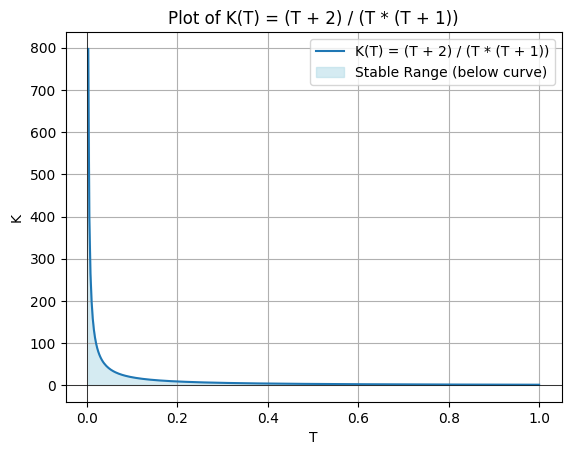

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of T, avoiding T = 0 and T = -1 to prevent division by zero
T = np.linspace(0, 1, 400)
T = T[np.logical_and(T != 0, T != -1)]

# Calculate K as a function of T
K = (T + 2) / (T * (T + 1))

# Plotting
plt.plot(T, K, label='K(T) = (T + 2) / (T * (T + 1))')
plt.fill_between(T, 1, K, color='lightblue', alpha=0.5, label='Stable Range (below curve)')

plt.xlabel('T')
plt.ylabel('K')
plt.title('Plot of K(T) = (T + 2) / (T * (T + 1))')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


**Nota su ritardo e stabilità**:
- Questo esempio illustra come l'aumento del ritardo ($\tau_D$) riduca il margine di stabilità, evidenziando l'effetto destabilizzante del ritardo nei sistemi di controllo.
- Il sistema sarà stabile per un valore inferiore a $K$.
- I tempi morti provocano instabilità nel sistema e dovrebbero essere ridotti il ​​più possibile.
- Qualsiasi coppia $(K, T)$ deve trovarsi nell'intervallo stabile.